# DSP - Assignment 1

by Tymur Lysenko

Import the necessary libraries.

In [1]:
import numpy as np
from numpy import pi, sin
from matplotlib import pyplot as plt
from IPython.display import display, Audio

Clone the repository with ADC.

In [2]:
# !git clone https://github.com/ta3map/ADC_simulator.git ADC_simulator_new

Import the ADC.

In [3]:
import ADC_simulator_new.ADC as ADC

Get samples from ADC.

In [4]:
v = 12 # student number from 1 to 14 (ask your TA to get it)
samples = 500 # number of samples to acquire
fs = 100 # Hz, samples per second
quant_levels = np.linspace(-1, 1, 3, dtype=int) # quantization levels

# Sound recording
recorded_samples = ADC.rec(
  v,
  samples,
  quant_levels,
  fs,
  base_path='./ADC_simulator_new',
)


Add _more_ **quantization levels** and _increase_ **sample rate**.

In [5]:
fs = 3000 # Hz, samples per second
quant_levels = np.linspace(-1, 1, 20) # quantization levels

recorded_samples = ADC.rec(
  v,
  samples,
  quant_levels,
  fs,
  base_path='./ADC_simulator',
)

In [6]:
Audio(recorded_samples, rate=fs)

# Optimize the ADC parameters

- The record should have at least several seconds, one has to find an optimal number of samples.

In [7]:
samples = 115200 # retrieved from the source data file

- The voice of a person being recorded should have a normal tone. So, for example, if the voice is heard with a high pitch, it is necessary to reduce the sampling rate.

In [8]:
fs = 32000 # retrieved from the source data file

- Do not increase the number of quantization levels more than necessary.

In [9]:
quant_levels = np.linspace(-1, 1, 2 ** 16) # assume that audio is 16 bit

Record the audio with the set parameters:

In [10]:
recorded_samples = ADC.rec(
  v,
  samples,
  quant_levels,
  fs,
  base_path='./ADC_simulator',
)

Audio(recorded_samples, rate=fs)

The words can be heard clearly, but the audio has some background hum.

Text(0, 0.5, 'Amplitude')

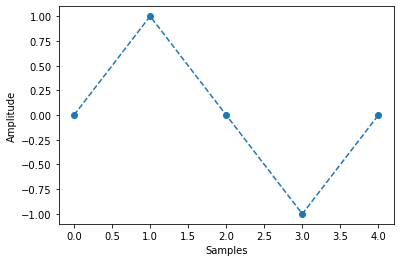

In [11]:
samples = [
  0,
  pi / 2,
  pi,
  (3 * pi) / 2,
  2 * pi
]

plt.plot(sin(samples), '--o')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

In [12]:
def get_sin(sin_ampl: float, sin_freq: float, fs: float, num_samples: int = None) -> (np.ndarray, float):
  if num_samples is None:
    num_samples = fs

  step_size = (2 * pi * sin_freq) / fs # oh no, step_size, please, help me, I am stuck
  samples = np.arange(0, num_samples) * step_size

  return sin_ampl * sin(samples), step_size

def plot_sin(sin_ampl: float, sin_freq: float, fs: float) -> None:
  y, step_size = get_sin(sin_ampl, sin_freq, fs)

  plt.figure(dpi=100)
  plt.plot(y, '--')
  plt.xlabel('Samples')
  plt.ylabel('Amplitude')
  plt.title('step size ' + str(step_size)[0:5] + '...')

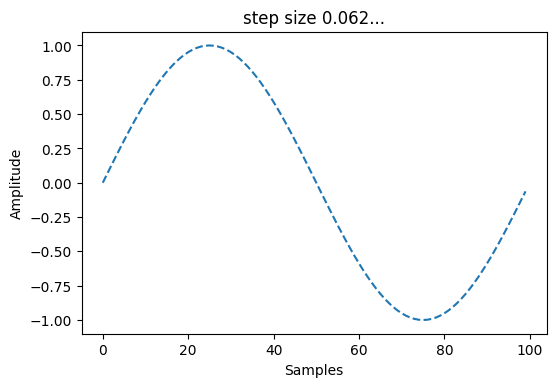

In [13]:
plot_sin(1, 1, 100)

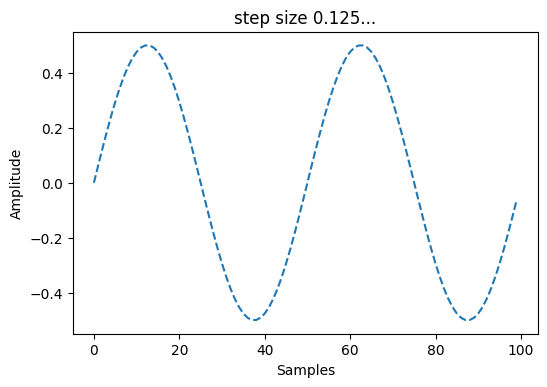

In [14]:
plot_sin(0.5, 2, 100)

Plot the recording.

Text(0.5, 1.0, 'Recording time domain')

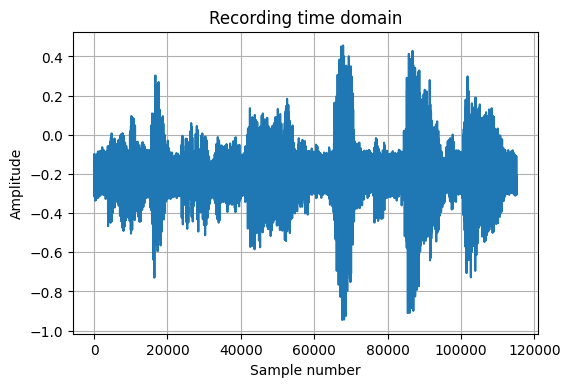

In [15]:
plt.figure(dpi=100)
plt.grid()
plt.plot(recorded_samples, '-')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.title('Recording time domain')

As it is seen from the plot, the recording is shifted by -0.2. Thus, it needs to be adjusted.

In [16]:
recorded_samples_shifted = recorded_samples + 0.2

Text(0.5, 1.0, 'Recording time domain')

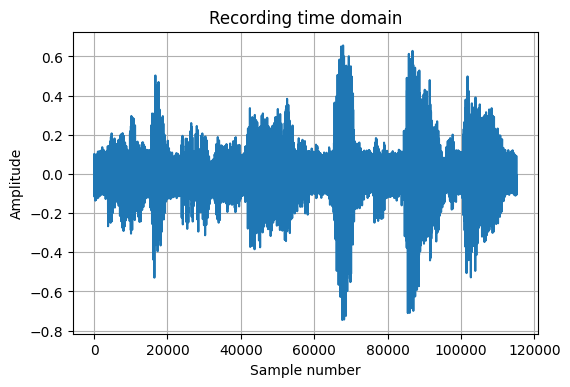

In [17]:
plt.figure(dpi=100)
plt.grid()
plt.plot(recorded_samples_shifted, '-')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.title('Recording time domain')

In [18]:
Audio(recorded_samples_shifted, rate=fs)

Find the sinusoidal wave and subtract it from the recording to get rid of the noise.

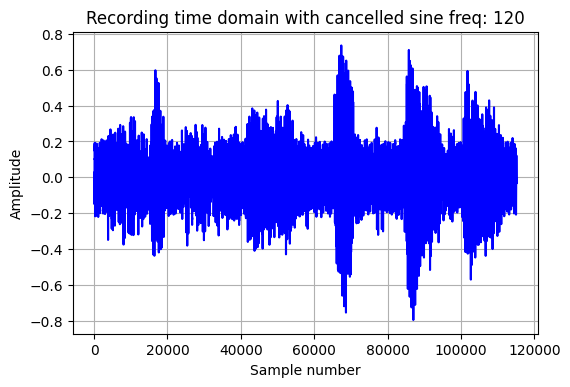

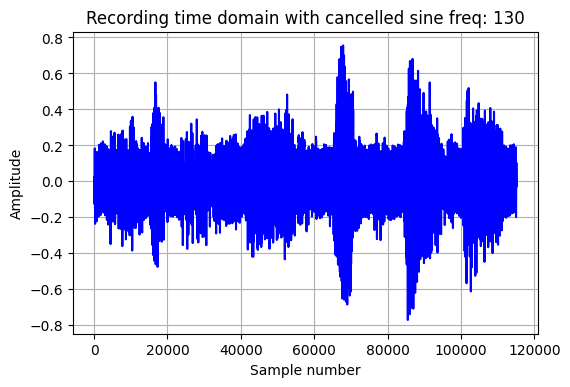

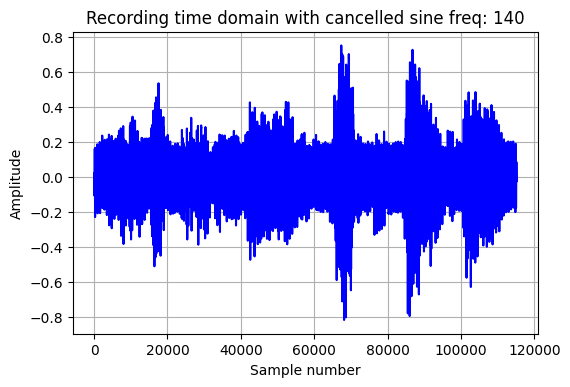

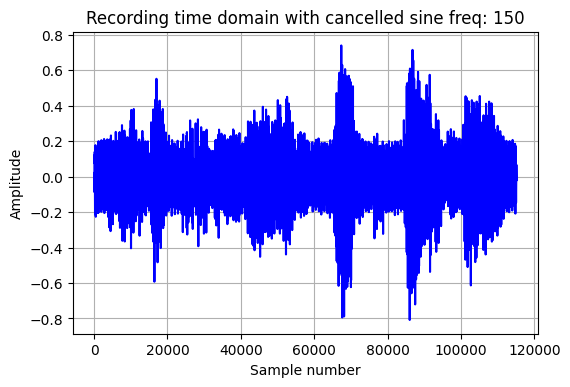

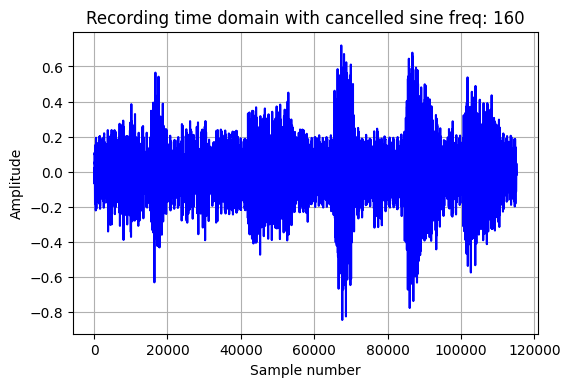

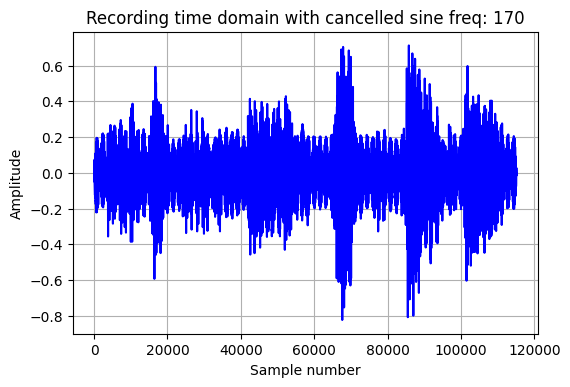

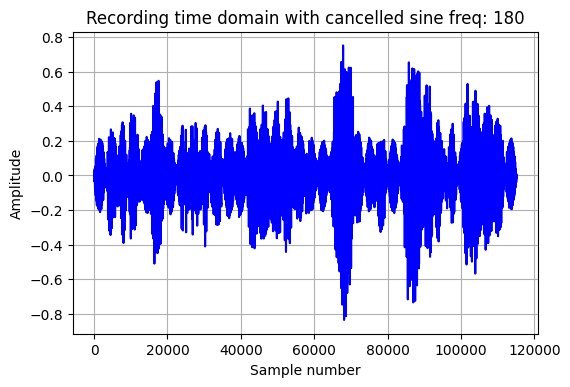

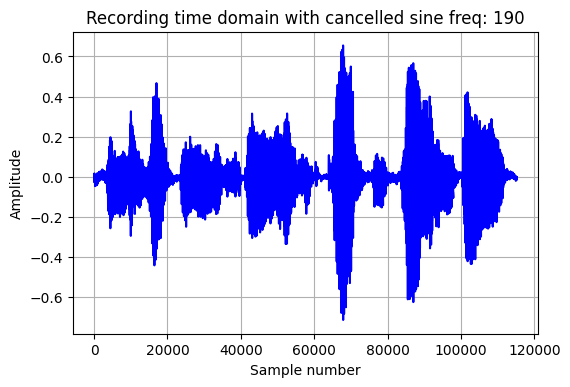

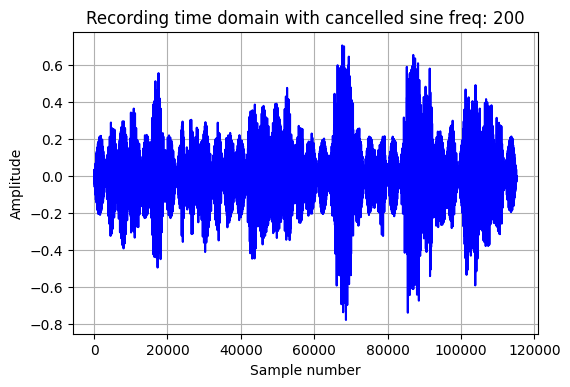

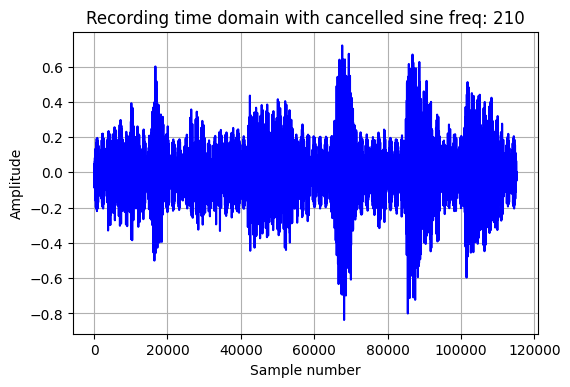

In [19]:
for sin_freq in np.arange(120, 220, 10, dtype=int):
  y, step_size = get_sin(0.1, sin_freq, fs, num_samples=len(recorded_samples_shifted))

  recorded_samples_without_sin = recorded_samples_shifted - y

  plt.figure(dpi=100)
  plt.grid()

  plt.plot(recorded_samples_without_sin, '-', color='blue')
  # plt.plot(y, '--', color='orange')
  display(Audio(recorded_samples_without_sin, rate=fs))

  plt.xlabel('Sample number')
  plt.ylabel('Amplitude')
  plt.title(f'Recording time domain with cancelled sine freq: {sin_freq}')


As it is seen from the plot and heard from the audio, the subtraction of `sin` with frequency `190` removes the noise.

Text(0.5, 1.0, 'Recording time domain with cancelled sin freq 190')

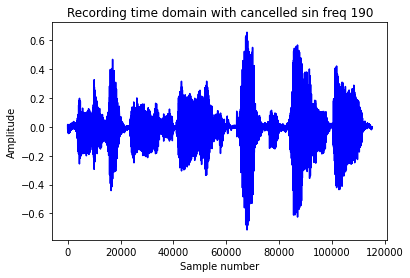

In [20]:
y, step_size = get_sin(0.1, 190, fs, num_samples=len(recorded_samples_shifted))

recorded_samples_without_sin = recorded_samples_shifted - y
plt.plot(recorded_samples_without_sin, '-', color='blue')

plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.title(f'Recording time domain with cancelled sin freq 190')

In [21]:
Audio(recorded_samples_without_sin, rate=fs)

P. S. The poem is "Alone" By Edgar Allan Poe.